### Day 1
Take an input of masses and sum the fuel required for each mass

In [171]:
def masstofuel(mass):
    return (mass // 3) - 2

with open("day1input.txt", "r") as file:
    masses = [int(x) for x in file.read().split("\n")[:-1]]
    #masses = [int(x) for x in file.read().split()[:-1]]

print(sum([masstofuel(m) for m in masses]))

3380731


In [172]:
def newmasstofuel(mass):
    total = 0
    addedfuel = (mass // 3) - 2
    while addedfuel > 0:
        total += addedfuel
        addedfuel = (addedfuel // 3) - 2
    
    return total

print(sum([newmasstofuel(m) for m in masses]))

5068210


### Day 2
Simple Turing machine/assembly code style thing

In [68]:
with open("day2input.txt") as file:
    programinput = [int(x) for x in file.read().split(",")]

def evaluate(program):
    i = 0
    while not program[4*i] == 99:
        op, a, b, c = program[4*i:4*(i+1)]
        if op == 1:
            program[c] = program[a] + program[b]
        elif op == 2:
            program[c] = program[a] * program[b]
        i += 1
    
    return program

def evaluate2(program):
    # A more proper implementation for later
    pc = 0
    while not program[pc] == 99:
        # Should maybe be changed; fixed instruction length can't be assumed
        op, a, b, c = program[pc:pc+4]
        if op == 1:
            program[c] = program[a] + program[b]
        elif op == 2:
            program[c] = program[a] * program[b]
        pc += 4
    
    return program


print(evaluate([1,9,10,3,2,3,11,0,99,30,40,50]))
print(evaluate2([1,9,10,3,2,3,11,0,99,30,40,50]))
print(evaluate([1,0,0,0,99]))
print(evaluate2([1,0,0,0,99]))
print(evaluate([2,3,0,3,99]))
print(evaluate2([2,3,0,3,99]))
print(evaluate([2,4,4,5,99,0]))
print(evaluate2([2,4,4,5,99,0]))
print(evaluate([1,1,1,4,99,5,6,0,99]))
print(evaluate2([1,1,1,4,99,5,6,0,99]))

## Actually do the task
program2 = programinput[:]
program2[1:3] = 12, 2
print(evaluate2(program2)[0])

[3500, 9, 10, 70, 2, 3, 11, 0, 99, 30, 40, 50]
[3500, 9, 10, 70, 2, 3, 11, 0, 99, 30, 40, 50]
[2, 0, 0, 0, 99]
[2, 0, 0, 0, 99]
[2, 3, 0, 6, 99]
[2, 3, 0, 6, 99]
[2, 4, 4, 5, 99, 9801]
[2, 4, 4, 5, 99, 9801]
[30, 1, 1, 4, 2, 5, 6, 0, 99]
[30, 1, 1, 4, 2, 5, 6, 0, 99]
5098658


In [70]:
## Part 2: determine which pair of numbers from 0 to 99 get the right output
for n in range(100):
    for v in range(100):
        changed = programinput[:]
        changed[1:3] = n, v
        
        try:
            result = evaluate2(changed)[0]
            #print(result)
            if result == 19690720:
                print(100 * n + v)
        except:
            pass


5064


### Day 3
Manhattan distance + where circuit diagrams cross or something
Implementation: start with (0, 0)/[0, 0]; progressively add on (d, 0) or (0, d) and somehow check intersections

In [5]:
with open("day3input.txt") as file:
    circuit1, circuit2 = [x.split(",") for x in file.read().split()]

directions = {'R': [1, 0], 'L': [-1, 0], 'U':[0, 1], 'D':[0, -1]}
manhattan = lambda v: abs(v[0]) + abs(v[1])


def points(circuit):
    visited = []
    start = [0, 0]
    for movement in circuit:
        direction = directions[movement[0]]
        distance = int(movement[1:])
        
        for i in range(distance):
            #visited += current
            visited += [start[:]]
            start[0] += direction[0]
            start[1] += direction[1]
            # maybe start += direction?
    return visited
    
path1 = points(circuit1)
path2 = points(circuit2)

distances = []

for point in path1:
    if point in path2:
        distances += [manhattan(point)]

print(min(distances[1:]))

Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
1674


In [67]:
def pointsdist(circuit):
    visited = []
    start = [0, 0]
    totaldist = 0
    for movement in circuit:
        direction = directions[movement[0]]
        distance = int(movement[1:])
        
        for i in range(distance):
            #visited += current
            visited += [(start[:], totaldist)]
            totaldist += 1
            start[0] += direction[0]
            start[1] += direction[1]
    return visited


circuit3, circuit4 = [x.split(',') for x in ["R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51","U98,R91,D20,R16,D67,R40,U7,R15,U6,R7"]]

path1dist = pointsdist(circuit1)
path2dist = pointsdist(circuit2)

distances2 = []

#for point in path1dist:
#    if point[0] in [x[0] for x in path2dist]:
#        distances2 += [point[1]]

for point in path1dist:
    for point2 in path2dist:
        if point[0] == point2[0]:
            distances2 += [point[1] + point2[1]]

print(sorted(distances2)[:5])

[0, 14012, 17070, 19722, 19750]


### Day 4: Password Cracking
6 digit number; two adjacent digits the same, increasing digits

In [13]:
repeated = ["00", "11", "22", "33", "44", "55", "66", "77", "88", "99"]
repeated3 = ["000", "111", "222", "333", "444", "555", "666", "777", "888", "999"]

n = 0
for i in range(178416, 676461): #178416, 676461
    if ("".join(sorted(str(i))) == str(i)) and any([x in str(i) for x in repeated]):
        n += 1

print(n)

m = 0

for j in range(178416, 676461):
    tobeadded = False
    if ("".join(sorted(str(j))) == str(j)):# and any([x in str(j) for x in repeated]) and all([y not in str(j) for y in repeated3]):
        for x in repeated:
            if x in str(j) and x[0]*3 not in str(j):
                tobeadded = True
        m += tobeadded

print(m)

1650
1129


## Day 5: More Intcode
Opcode 3 [3, a] places an inputted value at location a

Opcode 4 [4, a] outputs the value at address 50

'Parameter modes'/addressing modes:

Parameter mode 0 == position mode; reference memory address

Parameter mode 1 == immediate mode; give a complete value


Complete opcode: tens and units give opcode

Parameter modes are R->L, single digit, missing modes are 0
(Parameters that an instruction writes to will never be in immediate mode)

In [1]:
with open("day5input.txt") as file:
    diagnostic = [int(x) for x in file.read().split(",")]

# Possible way of saving opcodes:
# opcode : (length, func)
# params = program[pc : pc + length]
# do something with func(*params);
# maybe func(program, *params)?


def parseopcode(opcode):
    """Turn a full opcode into the operation and addressing modes"""
    op = opcode % 100
    #print("Opcode: ", op)
    modes = opcode // 100
    if op == 3: # or op == 4:
        return op, '1'
    if op == 1 or op == 2 or op == 7 or op == 8:
        return op, '1' + '0' * (opcodes[op][0] - len(str(modes))-1) + str(modes)
    return op, '0' * (opcodes[op][0] - len(str(modes))) + str(modes)

def add1(pc, p, a, b ,c):
    #print("add", a, b, c)
    return pc, p[:c] + [a+b] + p[c+1:]

def multiply2(pc, p, a, b, c):
    return pc, p[:c] + [a*b] + p[c+1:]

def input3(pc, p, a):
    return pc, p[:a] + [int(input("Enter a value:"))] + p[a+1:]

def output4(pc, p, a):
    #print(p[a])
    print("Output:", a)
    return pc, p

def jump5(pc, p, a, b):
    """Jump-if-true; if the first parameter is non-zero, it sets the instruction pointer to the value from the second parameter. Otherwise, it does nothing"""
    return pc if a == 0 else b, p

def jump6(pc, p, a, b):
    """Jump-if-false"""
    return b if a == 0 else pc, p

def less7(pc, p, a, b, c):
    "Less than comparison"
    return pc, p[:c] + [1 if a < b else 0] + p[c+1:]

def equals8(pc, p, a, b, c):
    """Equality checker""" #1 if a == b else 0
    #print("into equals", p)
    return pc, p[:c] + [1 if a == b else 0] + p[c+1:]

# 1:add, 2:multiply, 3:input, 4:output
opcodes = {1:(3, add1), 2:(3, multiply2), 3:(1, input3), 4:(1, output4), 5:(2, jump5), 6:(2, jump6), 7:(3, less7), 8:(3, equals8)}


def intcode(program):
    """Run an intcode program"""
    
    # Initialise program counter
    pc = 0
    
    while not program[pc] == 99:
        previouspc = pc
        #print(program[:pc+5])
        #print("PC:",pc)
        op, modes = parseopcode(program[pc])
        #print("Modes:", modes)
        length, func = opcodes[op]
        # Reverse modes because they go R -> L for some reason
        #print("Vals:", program[pc+1:pc+length+1])
        #print("Converted vals:", [(program[program[pc+i+1]] if m == '0' else program[pc+i+1]) for i, m in enumerate(modes[::-1])])
        pc, program = func(pc, program, *[(program[program[pc+i+1]] if m == '0' else program[pc+i+1]) for i, m in enumerate(modes[::-1])])
        
        if (previouspc != pc) and (op in [5, 6]): #(op == 5 and program[pc+1] != 0) or (op == 6 and program[pc+1] == 0):
            pass # Jumped
        else:
            pc += length + 1
        #print()
        
    return program

intcode(diagnostic)

"""intcode([3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,\
1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,\
999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99\
])"""
print()

## Day 6: Orbits
AAA)BBB means B directly orbits A; count the number of direct & indirect orbits

In [63]:
with open("day6input.txt") as file:
    orbitmap = file.read().split()



class orbittree():
    def __init__(self, name, children = None):
        self.name = name
        self.children = None
    
    def __str__(self):
        if self.children == None:
            return self.name
        else:
            return self.name + " [" + " ".join([child.__str__() for child in self.children]) + "]"
    
    def add(self, new, old):
        if self.name == old:
            self.children = [orbittree(new)] if self.children == None else self.children + [orbittree(new)]
        elif self.children == None or old not in [o.name for o in self.children]:
            pass
            #print("Parent is not in orbits")
        else:
            for child in self.children:
                child.add(new, old)


def ordermap(orbitmap):
    separated = [(o.split(")")) for o in orbitmap]
    left = lambda x: [s[0] for s in separated].index(x)
    right = lambda x: [s[1] for s in separated].index(x)
    final = [separated[left("COM")]]
    del[separated[left("COM")]]
    
    while len(separated) > 0:
        try:
            final += [separated[left(final[-1][1])]]
            del separated[left(final[-2][1])]
        except:
            return final + separated
    
    return final
    
#test = orbittree("COM")
#test.add("A", "COM")
#test.add("B", "COM")
#test.add("C", "B")
#print(test.name)
#print(test.children)

#maintree = orbittree("COM")


#for l, r in ordermap(orbitmap):
    maintree.add(r, l)

#print(maintree)

COM [1MF [99H]]


In [65]:
with open("day6input.txt") as file:
    orbitmap = [o.split(")") for o in file.read().split()]

total = 0
index = [l for l, r in orbitmap].index("COM")

for i, (l, r) in enumerate(orbitmap):
    total += 1
    index = i
    previous = l
    while not orbitmap[index][0] == "COM":
        total += 1
        index = [b for a, b in orbitmap].index(previous)
        previous = orbitmap[index][0]

print(total)

142497


In [72]:
orbitmap2 = {}
for l, r in orbitmap:
    orbitmap2[r] = l

def path(start):
    while start in orbitmap2:
        start = orbitmap2[start]
        yield start

tosanta = [*path("SAN")]

for i, path in enumerate(path("YOU")):
    if path in tosanta:
        print(tosanta.index(path) + i)
        break

301


## Day 7: Something about using intcode more properly

Each amplifier receives an input produces an output; the output of one becomes the input of the next

First input is 0, each amplifier runs one copy of the same program

First amplifier input is the unique number in {0,1,2,3,4} which is being tried; second input is the output of the previous amplifier (or 0 for the first)

Trying: [a, b ,c, d ,e]
Inputs in order: a, 0, b, (output of first run) etc

In [3]:
from itertools import permutations

#amplifier = [3,31,3,32,1002,32,10,32,1001,31,-2,31,1007,31,0,33,\
#1002,33,7,33,1,33,31,31,1,32,31,31,4,31,99,0,0,0]

amplifier = [int(x) for x in open("day7input.txt").read().split(',')]

inputstack = [0]

perms = permutations(range(5))

def input3fromstack(pc, p, a):
    """Takes the input from a global stack instead of user input"""
    return pc, p[:a] + [inputstack.pop()] + p[a+1:]

def output4tostack(pc, p, a):
    #print("Output:", a)
    inputstack.append(a)
    return pc, p


opcodes = {1:(3, add1), 2:(3, multiply2), 3:(1, input3fromstack), 4:(1, output4tostack), 5:(2, jump5), 6:(2, jump6), 7:(3, less7), 8:(3, equals8)}

largest = 0

for perm in [list(p) for p in list(perms)]:
    inputstack = [0]
    for letter in "ABCDE":
        # Actual amplifier loop
        inputstack.append(perm.pop())
        intcode(amplifier[:])
    largest = max(inputstack[0], largest)
    
print(largest)

338603


Feedback loop; output from amplifier E goes back into amplifier A.

Amplifiers now take inputs from 5 to 9.

Each amplifier has a program which remains between iterations

Check (?) whether program changes between iterations to assert if amplifier has finished.

A takes signal 0 again

In [2]:
"""OOP Intcode machine"""

class IntComputer():
    def __init__(self, program, start_stack = []):
        self.program = program[:] # Questionable; always copy the input program
        self.pc = 0 # Initialise program counter
        self.inputstack = start_stack
        self.finished = False
        #self.debug = debug
    
    def addinput(self, value):
        self.inputstack.append(value)
    
    def iteration(self, debug):
        previouspc = self.pc
        
        op = self.program[self.pc] % 100
        modes = [self.program[self.pc] // 100 % 10, self.program[self.pc] // 1000 % 10, self.program[self.pc] // 10000 % 10]
        
        #op, modes = self.parseopcode(self.program[self.pc])
        #func = self.opcodes[op]
        #if debug: print("pc", self.pc, "\nop", op, "\nrawmodes", str(self.program[self.pc])[:-1], "\nmodes", modes, "\nprogram", self.program[:], "\n")
        # Reverse modes because they go R -> L for some reason
        #convertedparams = [(self.program[self.program[self.pc+i+1]] if m == '0' else self.program[self.pc+i+1]) for i, m in enumerate(modes[::-1])]
        #convertedparams = [self.program[self.program[self.pc+i+1] if m == '0' else self.pc+i+1] for i, m in enumerate(modes[::-1])]
        #self.pc, self.program = func(self, self.pc, self.program, *convertedparams)
        
        convert = lambda val, m: self.program[val] if m == 0 else val
        
        if op in [1, 2]:
            # Addition or multiplication
            a, b  = convert(self.program[self.pc+1], modes[0]), convert(self.program[self.pc+2], modes[1])
            self.program[self.program[self.pc+3]] = a + b if op == 1 else a * b
            self.pc += 4
        elif op == 3:
            # Input
            self.program[self.program[self.pc+1]] = self.inputstack.pop()
            self.pc += 2
        elif op == 4:
            # Output
            self.inputstack.append(convert(self.program[self.pc+1], modes[0]))
            self.pc += 2
            return True
        elif op in [5, 6]:
            # Jump
            if op == 5 and convert(self.program[self.pc+1], modes[0]) != 0:
                self.pc = convert(self.program[self.pc+2], modes[1])
            elif op == 6 and convert(self.program[self.pc+1], modes[0]) == 0:
                self.pc = convert(self.program[self.pc+2], modes[1])
            else:
                # No jump
                self.pc += 3
        elif op in [7, 8]:
            # Comparisons
            if op == 7:
                condition = convert(self.program[self.pc+1], modes[0]) < convert(self.program[self.pc+2], modes[1])
            elif op == 8:
                condition = convert(self.program[self.pc+1], modes[0]) == convert(self.program[self.pc+2], modes[1])
            
            self.program[self.program[self.pc+3]] = int(condition)
            self.pc += 4
        
        return False

    
    def run(self, debug = False):
        """Run the intcode computer"""
        while not self.finished:
            self.iteration(debug)
            
            if self.program[self.pc] == 99:
                self.finished = True

    def run_until_output(self, debug = False):
        """Run until it generates some output"""
        while not self.finished:
            #outputted = self.iteration(debug)
            
            if self.iteration(debug): # Break on ouput
                #print(self.pc)
                return
            
            if self.program[self.pc] == 99:
                self.finished = True

# Some tests or whatever

tests = [[3,9,8,9,10,9,4,9,99,-1,8], [3,9,7,9,10,9,4,9,99,-1,8], [3,3,1108,-1,8,3,4,3,99],\
         [3,3,1107,-1,8,3,4,3,99], [3,12,6,12,15,1,13,14,13,4,13,99,-1,0,1,9],\
        [3,3,1105,-1,9,1101,0,0,12,4,12,99,1],
        [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,\
        1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,\
        999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99]]
vals = [[7, 8], [7, 8], [7, 8], [7, 8], [-4, 0], [-4, 0], [3, 10]]
results = [[0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [999, 1001]]

for prog, val, result in zip(tests, vals, results):
    #print("New program")
    comp = IntComputer(prog[:], [val[0]])
    comp.run()
    #print("New program")
    assert(comp.inputstack[0] == result[0])
    comp = IntComputer(prog[:], [val[1]])
    comp.run()
    assert(comp.inputstack[0] == result[1])




amplifier = [3,52,1001,52,-5,52,3,53,1,52,56,54,1007,54,5,55,1005,55,26,1001,54,\
-5,54,1105,1,12,1,53,54,53,1008,54,0,55,1001,55,1,55,2,53,55,53,4,\
53,1001,56,-1,56,1005,56,6,99,0,0,0,0,10]
#comp = IntComputer(amplifier[:])
perm = [9,7,8,5,6]
inputstack = [0]

from copy import deepcopy
from itertools import permutations
comps = [IntComputer(deepcopy(amplifier), inputstack) for char in "ABCDE"]

for i in range(5):
    #comp = IntComputer(amplifier[:], 0)
    #print(inputstack)
    comps[i].inputstack.append(perm[i])
    comps[i].run_until_output()
    #inputstack = comp.inputstack

while not all([comps[i].finished for i in range(5)]):
    for i in range(5):
        #print(inputstack)
        comps[i].run_until_output()

assert(inputstack == [18216])

amplifier = [int(op) for op in open("day7input.txt").read().split(',')]
largest = 0

for perm in permutations(range(5, 10)):
    inputstack = [0]
    comps = [IntComputer(deepcopy(amplifier), inputstack) for char in "ABCDE"]

    for i in range(5):
        #comp = IntComputer(amplifier[:], 0)
        #print(inputstack)
        comps[i].inputstack.append(perm[i])
        comps[i].run_until_output()
        #inputstack = comp.inputstack

    while not all([comps[i].finished for i in range(5)]):
        for i in range(5):
            #print(inputstack)
            comps[i].run_until_output()
    
    largest = max(largest, inputstack.pop())

print(largest)

# This was a bit of a hassle, I do have to say

63103596


## Day 8: Space Image Format

Images are sent as a series of digits that each represent the color of a single pixel. The digits fill each row of the image left-to-right, then move downward to the next row, filling rows top-to-bottom until every pixel of the image is filled.

Each image actually consists of a series of identically-sized layers that are filled in this way. So, the first digit corresponds to the top-left pixel of the first layer, the second digit corresponds to the pixel to the right of that on the same layer, and so on until the last digit, which corresponds to the bottom-right pixel of the last layer.



In [191]:
from math import log10
w, h = 25, 6
imageraw = open("day8input.txt").read()

image = [imageraw[i*w*h:(i+1)*w*h] for i in range((len(imageraw))//(w*h))]

digitcount = lambda xs, c: sum([1 if x == c else 0 for x in list(xs)])
zeros = [digitcount(l, '0') for l in image]
ones = [digitcount(l, '1') for l in image]
twos = [digitcount(l, '2') for l in image]

minindex = zeros.index(min(zeros))
print(ones[minindex] * twos[minindex])

2806


## Second part: display a message

First layer is in front, second behind that etc until last layer at the back.
0 black, 1 white, 2 transparent

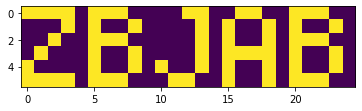

In [224]:
import numpy as np
from matplotlib import pyplot as plt

digitcount2 = lambda xs, c: sum(np.array(list(xs)) == c)

image2 = [np.array([int(x) for x in list(layer)]).reshape(h, w) for layer in image]

#final = np.zeros((h, w))
final = image2[0]

for i, layer in enumerate(image2[:-1]):
    final = np.where(final == 2, image2[i+1], final)

plt.imshow(final)

## Day 9: Making intcode even more proper

Parameter mode 2: relative mode, can be for reading or writing, parameter mode n |-> n + r where r is the relative base

Note: this mode can be used, like mode 0, for setting values. So it is no longer safe to assume than any value set (parameter c of opcodes 1/2, parameter a of opcode 3, parameter c of opcode 7/8) is always in mode 0; now one has to assume it can be any mode (and hope it's not mode 1).

Opcode 9: add the only parameter to the relative base

Also: memory beyond the initial program should exist & have the value 0
[perhaps extend only when required]

Large numbers need to be dealt with.

In [24]:
class IntComputer(IntComputer):
    def __init__(self, program, start_stack = []):
        self.program = program[:] # Questionable; always copy the input program
        self.pc = 0 # Initialise program counter
        self.rb = 0 # Initialise relative base
        self.inputstack = start_stack
        self.finished = False
    
    def iteration(self, debug):
        previouspc = self.pc
        
        op = self.program[self.pc] % 100
        modes = [self.program[self.pc] // 100 % 10, self.program[self.pc] // 1000 % 10, self.program[self.pc] // 10000 % 10]
        
        if debug: print("pc", self.pc, "\nrb", self.rb, "op", op, "\nmodes", modes, "\nprog", self.program, "\n")
        
        def set(address, value):
            """Set the value at the given address"""
            if address < len(self.program):
                self.program[address] = value
            else:
                self.program += [0] * (1 + address - len(self.program))
                self.program[address] = value
        
        def get(address):
            """Get the value at the given address"""
            if address < len(self.program):
                return self.program[address]
            else:
                return 0

        def convert(val, m):
            """Convert a parameter via the given mode"""
            if m == 0:
                return get(val)
            elif m == 1:
                return val
            elif m == 2:
                return get(self.rb + val)
        
        if op in [1, 2]:
            # Addition or multiplication
            a, b  = convert(get(self.pc+1), modes[0]), convert(get(self.pc+2), modes[1])
            
            """For posterity; this worked"""
            #if modes[2] == 0:
            #    set(get(self.pc+3), a+b if op == 1 else a*b)
            #elif modes[2] == 2:
            #    set(get(self.pc+3) + self.rb, a+b if op == 1 else a*b)
            
            set(get(self.pc+3) + (modes[2] == 2)*self.rb, a+b if op == 1 else a*b)
            
            self.pc += 4
        elif op == 3:
            # Input
            set(get(self.pc+1) + (modes[0] == 2)*self.rb, self.inputstack.pop())
            
            self.pc += 2
        elif op == 4:
            # Output
            self.inputstack.append(convert(get(self.pc+1), modes[0]))
            self.pc += 2
            
            return True
        elif op in [5, 6]:
            # Jump
            if op == 5 and convert(get(self.pc+1), modes[0]) != 0:
                # Jump if not equal
                self.pc = convert(get(self.pc+2), modes[1])
            elif op == 6 and convert(get(self.pc+1), modes[0]) == 0:
                # Jump if equal
                self.pc = convert(get(self.pc+2), modes[1])
            else:
                # No jump
                self.pc += 3
        elif op in [7, 8]:
            # Comparisons
            if op == 7:
                # Less than
                condition = convert(get(self.pc+1), modes[0]) < convert(get(self.pc+2), modes[1])
            elif op == 8:
                # Equal to
                condition = convert(get(self.pc+1), modes[0]) == convert(get(self.pc+2), modes[1])
            
            set(get(self.pc+3) + (modes[2] == 2)*self.rb, int(condition))
            
            self.pc += 4
        elif op == 9:
            # Changing relative base
            self.rb += convert(get(self.pc+1), modes[0])
            self.pc += 2
        
        # Whether the program has reached output yet
        return False


quine = [109,1,204,-1,1001,100,1,100,1008,100,16,101,1006,101,0,99]
comp = IntComputer(quine)
comp.run()
assert(quine == comp.inputstack)

from math import log10
longishnum = [1102,34915192,34915192,7,4,7,99,0]
comp = IntComputer(longishnum)
comp.run()
assert(15 < log10(comp.inputstack.pop()) <= 16)

longnum = [104,1125899906842624,99]
comp = IntComputer(longnum)
comp.run()
assert(comp.inputstack.pop() == longnum[1])

BOOST = [int(x) for x in open("day9input.txt").read().split(',')]
comp = IntComputer(BOOST[:], [1])
comp.run()
print("Part 1:", comp.inputstack.pop())

comp = IntComputer(BOOST[:], [2])
comp.run()
print("Part 2:", comp.inputstack.pop())

Part 1: 2518058886
Part 2: 44292


## Intcode: put it all in a big file, with some tests

In [2]:
from finalintcomputer import *

test = IntComputer([99])
test.run()

## Day 10: Asteroids and rubbish

In [178]:
import numpy as np

asteroidmap = np.array([list(line) for line in open("day10input.txt").read().split()])
asteroids = np.transpose((asteroidmap == '#').nonzero())

def display(map):
    for line in map:
        print("".join(line))

#display(asteroidmap)

total = [0]*len(asteroids)

for i, asteroid in enumerate(asteroids):
    hits = dict()
    for other in asteroids:
        pos = deepcopy(asteroid)
        if not all(asteroid == other):
            direction = other - asteroid
            #print(direction)
            direction //= np.gcd(*direction)
            #print("direction", direction)
            
            #print(pos)
            pos += direction
            while 0 <= pos[0] < asteroidmap.shape[0] and 0 <= pos[1] < asteroidmap.shape[1]:
                #print(pos)
                if asteroidmap[pos[0], pos[1]] == '#':
                    #print("Hit!", pos, "\n")
                    hits[tuple(pos)] = True
                    #total[i] += 1
                    break
                pos += direction
    total[i] = sum(hits.values())

#print(total)
print(max(total))
print(asteroids[total.index(max(total))])

329
[31 25]


#### Part 2, some rubbish about destroying sequentially asteroids or whatever

In [298]:
station = [3, 8]
asteroidmap = np.array([list(line) for line in open("day10input.txt").read().split()])
asteroids = list(np.transpose((asteroidmap == '#').nonzero()))

# Lexicographical
class Point:
    def __init__(self, y, x):
        self.x = x
        self.y = y
    def __lt__(self, other):
        return self.x < other.x or (self.x == other.x and self.y < other.y)

### Get all visible asteroids

# All relative coordinates; relative to the "centre" which is the station

direction = lambda v: v // np.gcd(*v)

# Is a occluded by b?
# Note; doesn't care about being occluded itself
occluded = lambda a, b: all(direction(a) == direction(b)) and (abs(b[0]) < abs(a[0]) or abs(b[1]) < abs(a[1]))
#print(occluded(np.array([-2, 0]), np.array([-3, 0])))
angle = lambda point, centre: (np.arctan2(point[0] - centre[0], -point[1]+centre[1]) + np.pi/2) % 2*np.pi

def cansee(point, centre, blocks):
    for b in blocks:
        #print(point-centre, b-centre)
        if occluded(point - centre, b - centre): return False
    return True

#display(asteroidmap)

#for asteroid in asteroids:
#    print(asteroid, cansee(asteroid, station, asteroids))

### Get the angles of all of them

#visible = asteroids[list(map(lambda a: cansee(a, station, asteroids), asteroids))]

#print(sorted(visible, key=lambda a: angle(a, station)))

def destroy(centre, asteroids, prevangle):
    visible = asteroids[list(map(lambda a: cansee(a, station, asteroids), asteroids))]
    sorts = sorted(visible, key = lambda a: (angle(a, station) - prevangle) % 2*np.pi)
    print(sorts)

#destroy(station, asteroids, np.pi/2)

### Find the one with the smallest angle between -90 and whatever 

arg = open("day10input2.txt")
ast = set()
import math
y = 0
for line in arg:
    x = 0
    for char in line:
        if char == "#":
            ast.add((x,y))
        x += 1
    y += 1

def pgcd(a,b):
    a,b = abs(a),abs(b)
    if b > a:
        return pgcd(b,a)
    if b == 0:
        return a
    return pgcd(b, a%b)

def can_see(a, asteroids):
    x1,y1 = a
    d = dict()
    for (x2,y2) in asteroids:
        if (x1,y1) == (x2,y2):
            continue
        p = pgcd(x1-x2, y1-y2)
        dx, dy = (x2-x1)//p, (y2-y1)//p # "direction"
        if (dx,dy) not in d:
            d[(dx,dy)] = (x2,y2)
        else:
            x3,y3 = d[(dx,dy)]
            # replace the point if there's a closer one in the same direction
            if abs(x2-x1) + abs(y2-y1) < abs(x3-x1) + abs(y3-y1):
                d[(dx,dy)] = (x2,y2)
    return set(d.values())

number_seen = dict()
for a in ast:
    number_seen[a] = len(can_see(a, ast))

best = max(number_seen, key = lambda e: number_seen[e])
print(best, number_seen[best])


def angle_sort(x,y):
    a = math.atan2(x,-y)
    if a < 0:
        a = 2*math.pi + a
    return a

destroyed = set()
d = dict()
k = 1

while len(destroyed) != len(ast) - 1:
    can_destroy = can_see(best, ast-destroyed)
    s = sorted(can_destroy, key = lambda e: angle_sort(e[0]-best[0], e[1]-best[1]))
    for x,y in s:
        destroyed.add((x,y))
        d[k] = (x,y)
        #print(k, "\t", (x,y))
        k += 1
    #print("-------------------")
    
print(d[200])


(25, 31) 329
(5, 12)


# I'm a mathematician, this shouldn't be so difficult

tan(theta(x, y)) = x/(-y) -> theta(x, y) = arctan2(-y, x) or so it seems

Note all coords should be relative (do this somewhere); 
sort by angle and then by magnitude

In [299]:
""" Let's do this properly christ """

???

Object `?` not found.


## Day 11: Painting the ship with intcode

In [354]:
from collections import defaultdict
from finalintcomputer import *


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __add__(self, other):
        return Point(self.x+other.x, self.y+other.y)
    def __sub__(self, other):
        return Point(self.x-other.x, self.y-other.y)
    def __str__(self):
        return("({0}, {1})".format(self.x, self.y))
    def __repr__(self):
        return("({0}, {1})".format(self.x, self.y))
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    def __hash__(self):
        return hash((self.x, self.y))

position = Point(0, 0)
direction = 0 # Start facing upwards

directions = {0: Point(0, 1), 1: Point(1, 0), 2: Point(0, -1), 3: Point(-1, 0)}


hullpainter = IntComputer([int(x) for x in open("day11input.txt").read().split(',')])
hull = defaultdict(lambda: 0)
changed = dict()

hullpainter.inputstack.append(hull[position])
hullpainter.run_until_output()
hullpainter.run_until_output()


while not hullpainter.finished:
    # Get and slightly parse the output
    direction += 2 * hullpainter.inputstack.pop() - 1
    direction %= 4
    col = hullpainter.inputstack.pop()
    
    if hull[position] != col:
        changed[position] = True
    
    hull[position] = col
    
    position += directions[direction]
    
    hullpainter.inputstack.append(hull[position])
    hullpainter.run_until_output()
    hullpainter.run_until_output()

print("Part 1:", len(hull.values()))

Part 1: 2720


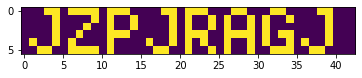

In [371]:
## Part 2

hullpainter = IntComputer([int(x) for x in open("day11input.txt").read().split(',')])
hull = defaultdict(lambda: 0)
position = Point(0, 0)
direction = 0 # Start facing upwards

hull[position] = 1

hullpainter.inputstack.append(hull[position])
hullpainter.run_until_output()
hullpainter.run_until_output()

while not hullpainter.finished:
    # Get and slightly parse the output
    direction += 2 * hullpainter.inputstack.pop() - 1
    direction %= 4
    col = hullpainter.inputstack.pop()
    
    hull[position] = col
    
    position += directions[direction]
    
    hullpainter.inputstack.append(hull[position])
    hullpainter.run_until_output()
    hullpainter.run_until_output()

xvals = [a.x for a in hull.keys()]
yvals = [a.y for a in hull.keys()]

finalhull = [[hull[Point(x, y)] for x in range(min(xvals), max(xvals)+1)] for y in range(max(yvals), min(yvals)-1, -1)]
import matplotlib.pyplot as plt
plt.imshow(finalhull)

## Day 12: Newton Absolutely Oversimplified

Each moon has a 3d position and velocity; the velocity of each starts at (0, 0, 0).

Between each pair of moons gravity acts; consider each coordinate seperately.

For x (e.g.): x>x' => grav +1, x==x' => grav 0, x<x' => grav -1

After calculating gravity you add the gravity onto each moon's velocity

Finally add the velocity onto each moon's position

In [410]:
class Vec3():
    def __init__(self, x=0, y=0, z=0):
        self.x, self.y, self.z = x, y, z
    def __add__(self, other):
        return Vec3(self.x+other.x, self.y+other.y, self.z+other.z)
    def __sub__(self, other):
        return Vec3(self.x-other.x, self.y-other.y, self.z-other.z)
    def __str__(self):
        return "({0}, {1}, {2})".format(self.x, self.y, self.z)
    def __repr__(self):
        return self.__str__()
    def __floordiv__(self, q):
        return Vec3(self.x//q, self.y//q, self.z//q)
    def __abs__(self):
        return abs(self.x) + abs(self.y) + abs(self.z)
    def __hash__(self):
        return hash((self.x, self.y, self.z))

class Moon():
    def __init__(self, pos, vel = Vec3()):
        self.pos = pos
        self.vel = vel
        self.hash = hash((pos.x, pos.y, pos.z))
    def __str__(self):
        return "Pos: {0}, Vel: {1}".format(self.pos, self.vel)
    def __repr__(self):
        return self.__str__()
    def update(self):
        self.pos += self.vel
    def __eq__(self, other):
        return self.hash == other.hash
    def energy(self):
        return abs(self.pos) * abs(self.vel)
    def __hash__(self):
        return hash((hash(self.pos), hash(self.vel)))

def gravity(a, b):
    """Gravity on a from b; a's velocity changes by grav, b's changes by -grav"""
    diff = b-a
    return Vec3(*np.sign([diff.x, diff.y, diff.z]))

def applygravity(a, b):
    grav = gravity(a.pos, b.pos)
    a.vel += grav
    b.vel -= grav
    return a, b

"""<x=-1, y=0, z=2>
   <x=2, y=-10, z=-7>
   <x=4, y=-8, z=8>
   <x=3, y=5, z=-1>"""

"""
Second example:
<x=-8, y=-10, z=0>
<x=5, y=5, z=10>
<x=2, y=-7, z=3>
<x=9, y=-8, z=-3>
"""

"""
Day 12 input:
<x=0, y=4, z=0>
<x=-10, y=-6, z=-14>
<x=9, y=-16, z=-3>
<x=6, y=-1, z=2>
"""
moon1 = Moon(Vec3(0, 4, 0))
moon2 = Moon(Vec3(-10, -6, -14))
moon3 = Moon(Vec3(9, -16, -3))
moon4 = Moon(Vec3(6, -1, 2))

moons = [moon1, moon2, moon3, moon4]

for i in range(1000):
    #print([m.pos for m in moons])
    #print([m.vel for m in moons])
    #print()
    for i, m in enumerate(moons):
        for n in moons[i+1:]:
            #if n != m:
            m, n = applygravity(m, n)
    
    for m in moons:
        #m.vel //= 2
        m.update()

print([m.pos for m in moons])
print([m.vel for m in moons])
print()

print(sum(m.energy() for m in moons))

[(-16, 79, -15), (124, -44, 39), (-57, -47, -4), (-46, -7, -35)]
[(9, 0, 1), (-16, -16, -12), (2, 7, 6), (5, 9, 5)]

13500


In [470]:
from copy import deepcopy

"""<x=-1, y=0, z=2>
   <x=2, y=-10, z=-7>
   <x=4, y=-8, z=8>
   <x=3, y=5, z=-1>"""

moon1 = Moon(Vec3(0, 4, 0))
moon2 = Moon(Vec3(-10, -6, -14))
moon3 = Moon(Vec3(9, -16, -3))
moon4 = Moon(Vec3(6, -1, 2))

initialmoons = [moon1, moon2, moon3, moon4]

xvals = lambda m: m.vel.x
yvals = lambda m: m.vel.y
zvals = lambda m: m.vel.z

cycles = [0, 0, 0]
funcs = {0:xvals, 1:yvals, 2:zvals}
funcs2 = {0:lambda m:m.pos.x, 1:lambda m:m.pos.y, 2:lambda m:m.pos.z, }
previous = dict()

# x:
for i in range(3):
    moons = deepcopy(initialmoons)
    j = 0
    while any(funcs[i](m) != 0 for m in moons) or j == 0 or any(funcs2[i](m) != funcs2[i](initialmoons[j]) for j, m in enumerate(moons)):
        for k, m in enumerate(moons):
            for n in moons[k+1:]:
                m, n = applygravity(m, n)
        for m in moons:
            m.update()
        #print(moons)
        previous[j] = deepcopy(moons)
        j += 1
    print(moons)
    cycles[i] = j

print(cycles)

[Pos: (0, -357, -37), Vel: (0, -4, 4), Pos: (-10, -332, -62), Vel: (0, -18, -10), Pos: (9, 556, 86), Vel: (0, -9, 6), Pos: (6, 114, -2), Vel: (0, 31, 0)]
[Pos: (-144, 4, 115), Vel: (-7, 0, 9), Pos: (295, -6, 100), Vel: (76, 0, 6), Pos: (-410, -16, -269), Vel: (-11, 0, -28), Pos: (264, -1, 39), Vel: (-58, 0, 13)]
[Pos: (-194, 722, 0), Vel: (-5, 20, 0), Pos: (-12, 318, -14), Vel: (32, 0, 0), Pos: (74, -733, -3), Vel: (-61, -34, 0), Pos: (137, -326, 2), Vel: (34, 14, 0)]
[286332, 161428, 96236]


In [471]:
from functools import reduce
from math import gcd
lcm = lambda a, b: int(a*b/gcd(a, b))
print(reduce(lcm, cycles))


278013787106916


4448220593710656

## Day 13: Advent Arcade Cabinet

Every 3 output instructions are x pos, y pos, tile id

{0: empty, 1: wall, 2: block, 3: horizontal paddle, 4: ball}


In [31]:
from finalintcomputer import *

from collections import defaultdict

arcade = IntComputer([int(x) for x in open("day13input.txt").read().split(',')])
screen = defaultdict(lambda: 0)

tiles = {0: ' ', 1: '█', 2: '#', 3: '_', 4: 'o'}

def display(screen):
    keys = screen.keys()
    xs, ys = [k[0] for k in keys], [k[1] for k in keys]
    for y in range(min(ys), max(ys)+1):
        for x in range(min(xs), max(xs)+1):
            print(tiles[screen[(x, y)]], end='')
        print()

#arcade.run_until_output()
#del arcade.inputstack[:16]

while not arcade.finished:
    try:
        arcade.inputstack = []
        arcade.run_until_output()
        arcade.run_until_output()
        arcade.run_until_output()
        x, y, tileid = arcade.inputstack
        arcade.inputstack = []
        screen[(x, y)] = tileid
    except:
        pass

display(screen)
print(sum(val == 2 for val in screen.values()))

█████████████████████████████████████
█                                   █
█  ## ## ###   #### ##### #### #    █
█  #  ##   ## ##   ## ####  ##  # # █
█  ###   ####  ## # # ## ### ## ### █
█ #  ### ## # ####  ### ##    ##  # █
█ ###   ### #####   ## ### #     ## █
█ ######  ###    #  # ####  ####### █
█   #  ### #    #    # #   #  # ### █
█ #  ##   #   #### ## ## ########   █
█ #   # #####  # ##  ## ## ## #  ## █
█ # ## ##     ## #   ## ########### █
█    # #### ## ### ## ### #  ## #   █
█  ### # # ###  ## ###    # ## # ## █
█  #### ##         ####    # ### #  █
█ # ######      ## ####  #####   ## █
█                                   █
█               o                   █
█                                   █
█                                   █
█                 _                 █
█                                   █
265


In [3]:
## Now play the game; this is interesting


def display2(screen, score):
    keys = screen.keys()
    if len(keys) == 0:
        return
    xs, ys = [k[0] for k in keys], [k[1] for k in keys]
    for y in range(min(ys), max(ys)+1):
        for x in range(min(xs), max(xs)+1):
            print(tiles[screen[(x, y)]], end='')
        print()
    print("Score:", score)

from finalintcomputer2 import IntComputer
from collections import defaultdict
from numpy import sign

tiles = defaultdict(lambda: '*', {0: ' ', 1: '█', 2: '#', 3: '@', 4: 'o'})

# Get the original program
arcade = IntComputer([int(x) for x in open("day13input.txt").read().split(',')])
arcade.program[0] = 2
screen = defaultdict(lambda: 0)
score = 0
move = None
userplaying = False

ballx = bally = paddlex = 0

while not arcade.finished:
    #while not arcade.needsinput:
    #    arcade.run_until_output()
    arcade.run_until_input()
    
    while len(arcade.outputstack) > 2:
        tileid = arcade.outputstack.pop()
        y = arcade.outputstack.pop()
        x = arcade.outputstack.pop()
        if (x, y) == (-1, 0):
            score = tileid
        else:
            screen[(x, y)] = tileid
        
        if tileid == 3:
            paddlex = x
        elif tileid == 4:
            ballx = x

    #display2(screen, score)
    if userplaying:
        arcade.add_input(int(input()))
    else:
        #print(int(sign(ballx-paddlex)))
        arcade.add_input(int(sign(ballx-paddlex)))

display2(screen, score)

█████████████████████████████████████
█                                   █
█                                   █
█                                   █
█                                   █
█                                   █
█                                  o█
█                                   █
█                                   █
█                                   █
█                                   █
█                                   █
█                                   █
█                                   █
█                                   █
█                                   █
█                                   █
█                                   █
█                                   █
█                                   █
█                                  @█
█                                   █
Score: 13331


## Day 14: Reaction Recipes and Regex Replacement (Python)

In [122]:
reactions = dict()

for line in open("day14input.txt").readlines():
    left, right = line.split(' => ')
    right = right[:-1].split(' ')
    reactions[(int(right[0]), right[1])] = [tuple(l.split(' ')) for l in left.split(', ')]

get = lambda name: list(reactions.keys())[[x[1] for x in reactions.keys()].index(name)]

#print(get("FUEL"))
#print(reactions[(1, "FUEL")])

def amount(name):
    if name == "ORE":
        return 1
    else:
        try:
            stuff = get(name)
            print(name, reactions[get(name)])
            #print(sum(int(a) * amount(n) for a, n in reactions[get(name)]))
            return sum(int(a) * amount(n) for a, n in reactions[get(name)])
        except:
            return 1

print(amount("FUEL"))

FUEL [('2', 'AB'), ('3', 'BC'), ('4', 'CA')]
AB [('3', 'A'), ('4', 'B')]
A [('9', 'ORE')]
B [('8', 'ORE')]
BC [('5', 'B'), ('7', 'C')]
B [('8', 'ORE')]
C [('7', 'ORE')]
CA [('4', 'C'), ('1', 'A')]
C [('7', 'ORE')]
A [('9', 'ORE')]
533


## Day 16: Some phase stuff

In [72]:
num = int(open("day16input.txt").read())
#print(num)
inp = [int(x) for x in list(str(num))]
pattern = [0, 1, 0, -1]

last = lambda n: abs(n) % 10

def apply(inp, pat):
    return [last(sum(j * pattern[(index2+1) // (index+1) % 4] for index2, j in enumerate(inp))) for index, i in enumerate(inp)]

"""for index, i in enumerate(inp):
    for index2, j in enumerate(inp):
        print(j * pattern[(index2+1) // (index+1) % 4], end = ' ')
    
    output[index] += last(sum(j * pattern[(index2+1) // (index+1) % 4] for index2, j in enumerate(inp)))
    print()
    
print(output)"""

for i in range(100):
    inp = apply(inp, pattern)

print("".join([str(n) for n in inp[:8]]))


34841690


In [84]:
## Part 2

#num = int(open("day16input.txt").read())
inp = [int(x) for x in list(str("03036732577212944063491565474664"))] * 10000
loc = int("".join([str(x) for x in inp[:7]]))

size = len("03036732577212944063491565474664")

pattern = [0, 1, 0, -1]

#last = lambda n: abs(n) % 10

def apply(inp, pat):
    return [last(sum(j * pattern[(index2+1) // (index+1) % 4] for index2, j in enumerate(inp))) for index, i in enumerate(inp)]

for i in range(100):
    inp = apply(inp, pattern)

print("".join([str(n) for n in inp[loc:loc+8]]))


KeyboardInterrupt: 